In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Path to your dataset folder in Google Drive
data_dir = '/content/drive/MyDrive/donateacry_corpus/'

# Function to extract MFCC features from audio files
# Function to extract MFCC features from audio files
# Function to extract MFCC features from audio files with fixed length
def extract_features(file_path, mfcc=True, n_mfcc=13, max_pad_len=300):
    audio, sr = librosa.load(file_path, sr=None)
    if mfcc:
        features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    else:
        features = np.abs(librosa.stft(audio))

    # Pad or trim the features to a fixed length
    if max_pad_len and features.shape[1] < max_pad_len:
        pad_width = max_pad_len - features.shape[1]
        features = np.pad(features, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        features = features[:, :max_pad_len]

    return features



# Load and preprocess the data
def load_data_from_folder(data_folder):
    X = []
    y = []
    classes = os.listdir(data_folder)

    for i, _class in enumerate(classes):
        class_folder = os.path.join(data_folder, _class)
        for file_name in os.listdir(class_folder):
            file_path = os.path.join(class_folder, file_name)
            features = extract_features(file_path)
            X.append(features)
            y.append(i)

    return np.array(X), np.array(y)

# Load data from your dataset folder
X, y = load_data_from_folder(data_dir)

# Convert labels to categorical (one-hot encoded)
y = to_categorical(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Train data shape: (372, 13, 300)
Train labels shape: (372, 5)
Test data shape: (93, 13, 300)
Test labels shape: (93, 5)


In [12]:
from tensorflow.keras.layers import Reshape

# Reshape the input data to fit into Conv2D layer
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define the CNN model with padding
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))  # Add padding here
model.add(MaxPooling2D((2, 2)))  # Reduce pooling here
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))  # 5 classes for the 5 types of baby cries

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 13, 300, 32)       320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 150, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 150, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 75, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 75, 128)        73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 1, 37, 128)       

In [13]:
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and preprocessed your data (X, y)

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Train data shape: (372, 13, 300)
Train labels shape: (372, 5)
Test data shape: (93, 13, 300)
Test labels shape: (93, 5)


Epoch 1/10
12/12 [==============================] - 8s 482ms/step - loss: 0.1171 - accuracy: 0.9677 - val_loss: 1.7181 - val_accuracy: 0.7957
Epoch 2/10
12/12 [==============================] - 4s 343ms/step - loss: 0.1220 - accuracy: 0.9543 - val_loss: 1.7863 - val_accuracy: 0.7957
Epoch 3/10
12/12 [==============================] - 3s 211ms/step - loss: 0.1049 - accuracy: 0.9651 - val_loss: 2.0274 - val_accuracy: 0.7849
Epoch 4/10
12/12 [==============================] - 4s 352ms/step - loss: 0.1431 - accuracy: 0.9489 - val_loss: 1.8276 - val_accuracy: 0.7957
Epoch 5/10
12/12 [==============================] - 4s 309ms/step - loss: 0.0900 - accuracy: 0.9758 - val_loss: 1.6121 - val_accuracy: 0.7634
Epoch 6/10
12/12 [==============================] - 3s 209ms/step - loss: 0.0795 - accuracy: 0.9785 - val_loss: 2.0121 - val_accuracy: 0.7634
Epoch 7/10
12/12 [==============================] - 3s 223ms/step - loss: 0.0792 - accuracy: 0.9677 - val_loss: 2.3043 - val_accuracy: 0.7527
Epoch 

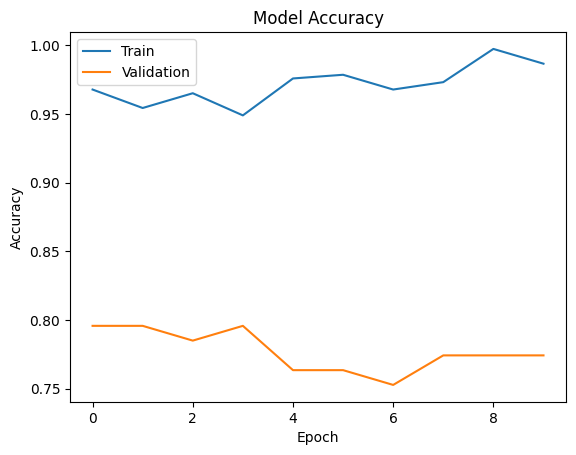

In [24]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
model.save('trained_model.h5')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [20]:
model.evaluate(X_test, y_test)


3/3 [==============================] - 0s 59ms/step - loss: 1.7715 - accuracy: 0.7742


[1.7714555263519287, 0.774193525314331]

In [21]:
import librosa

# Function to load and preprocess audio data
def load_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # Pad or truncate the mfccs to have the desired length (300 frames)
    max_length = 300
    if mfccs.shape[1] < max_length:
        mfccs = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
    else:
        mfccs = mfccs[:, :max_length]

    reshaped_data = mfccs.reshape(1, mfccs.shape[0], mfccs.shape[1], 1)
    return reshaped_data


# Load and preprocess the audio file
new_data_path = '/content/drive/MyDrive/Infant_cry_analysis_and_classification_using_CNN-main/baby-crying-01.wav'
new_data = load_audio(new_data_path)

# Make predictions on the new data
predictions = model.predict(new_data)

# Further process or analyze the predictions as needed


1/1 [==============================] - 0s 36ms/step


In [22]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Load the input voice file and preprocess it
def preprocess_input_voice(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    max_length = 300  # Assuming your model expects input shape (13, 300)
    if mfccs.shape[1] < max_length:
        mfccs = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
    else:
        mfccs = mfccs[:, :max_length]
    return mfccs.reshape(1, mfccs.shape[0], mfccs.shape[1], 1)

# Load the trained model
model = load_model('trained_model.h5')  # Replace with your model file path

# Function to predict the reason for baby crying
def predict_baby_cry_reason(file_path):
    preprocessed_data = preprocess_input_voice(file_path)
    predictions = model.predict(preprocessed_data)
    # Interpret predictions (based on the output probabilities) to determine the reason
    reasons = ['Hunger', 'Belly Pain', 'Burping', 'Discomfort', 'Tiredness']
    predicted_reason_index = np.argmax(predictions)
    predicted_reason = reasons[predicted_reason_index]
    return predicted_reason

# Usage example:
input_voice_path = '/content/drive/MyDrive/Infant_cry_analysis_and_classification_using_CNN-main/baby-crying-01.wav'  # Replace with your input voice file path
predicted_reason = predict_baby_cry_reason(input_voice_path)
print(f"The predicted reason for the baby crying is: {predicted_reason}")


1/1 [==============================] - 0s 149ms/step
The predicted reason for the baby crying is: Belly Pain


3/3 [==============================] - 1s 98ms/step - loss: 1.7715 - accuracy: 0.7742
Model Accuracy: 77.42%


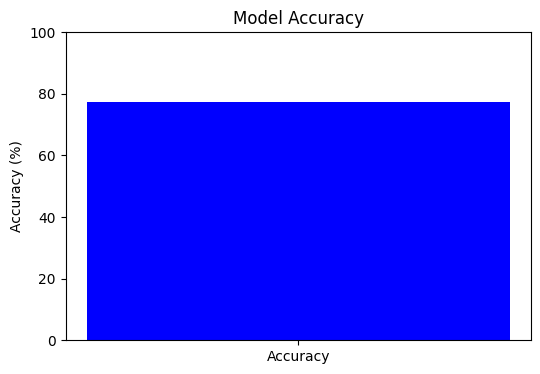

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load your testing data and labels (X_test, y_test)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Print accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Plotting accuracy
labels = ['Accuracy']
values = [accuracy * 100]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.ylim(0, 100)

plt.show()
